In [86]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.moment_helpers import cov2corr

import pystan
import stan_utility
import sys

In [42]:
#task 1
with open('gamma.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model("gamma.stan")

/* gamma distribution */
data {
    real alpha;
    real beta;
}
generated quantities {
    real y = gamma_rng (alpha, beta);
}
Using cached StanModel


In [15]:
i=1000
data=dict(alpha=2, beta=3)
samp=model.sampling(data=data,algorithm="Fixed_param", iter=i, warmup=0, chains=1)
y = samp.extract()['y']

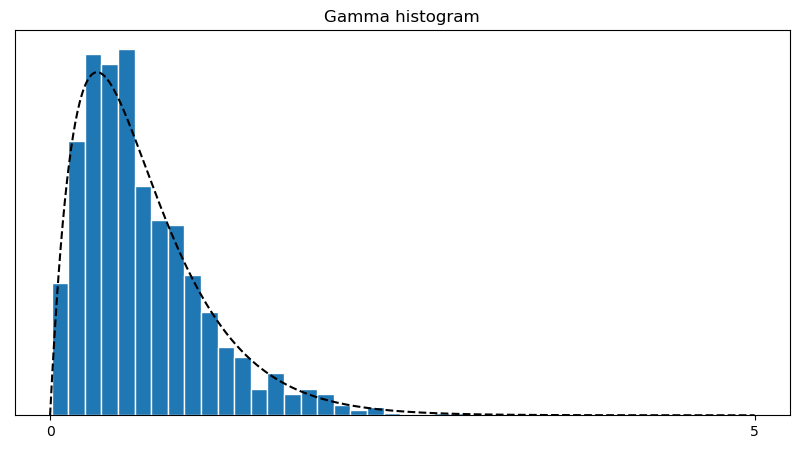

In [27]:
plt.style.use('default')
alpha = 2
beta = 3
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ax1=axes
ax1.hist(y,bins=25, density=True, edgecolor='white')
x=np.linspace(0,5,1000)
ax1.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,5])
ax1.set_yticks([])
ax1.set_title(r'Gamma histogram')
plt.show()

In [59]:
with open('gamma_inv.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('gamma_inv.stan')

/*gamma_inv distribution*/
data {
    real alpha;
    real beta;
}
generated quantities {
    real y = inv_gamma_rng (alpha, beta);
}
Using cached StanModel


In [60]:
i=1000
data=dict(alpha=2, beta=3)
sim=model.sampling(data=sim_data,algorithm="Fixed_param", iter=i, warmup=0, chains=1)
y = sim.extract()['y']

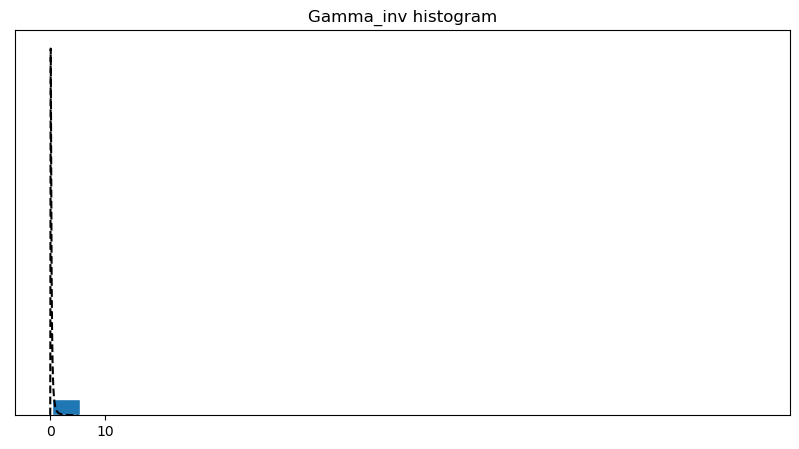

In [62]:
plt.style.use('default')
alpha = 2
beta = 3
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ax1=axes
ax1.hist(y,bins=25, density=True, edgecolor='white')
x=np.linspace(0,5,1000)
ax1.plot(x,stats.invgamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,10])
ax1.set_yticks([])
ax1.set_title(r'Gamma_inv histogram')
plt.show()

In [48]:
#task2
with open('negBinC.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('negBinC.stan')

/*negative binomial distribution concentration*/
data {
    real alpha;
    real mu;
}
generated quantities {
    real nbin_con = neg_binomial_rng (alpha, alpha/mu);
    real poisson_con = poisson_rng(nbin_con);
}
Using cached StanModel


In [49]:
alpha = 2
mu = 7
i=1000
data=dict(alpha=alpha,mu=mu)
sim=model.sampling(data=data,algorithm="Fixed_param", iter=R, warmup=0, chains=1)
params=sim.extract()
nBinC=params['nbin_con']
poissonC=params['poisson_con']

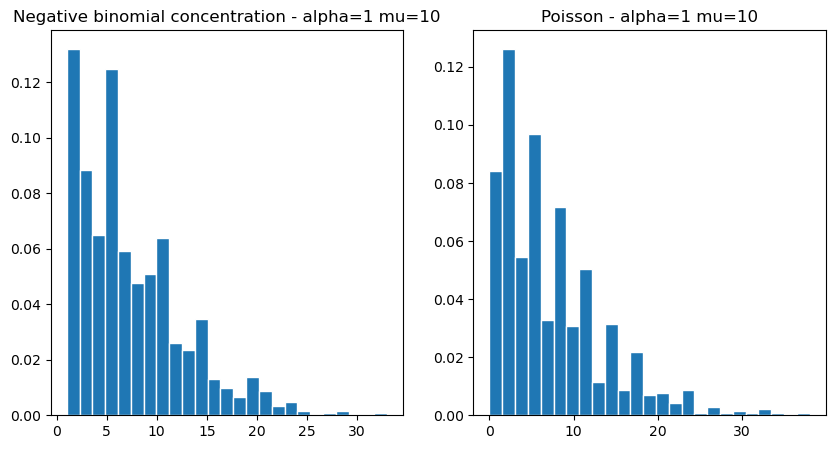

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax1=axes[0]
ax1.hist(nBinC,bins=25, edgecolor='white', density=True)
ax1.set_title(r'Negative binomial concentration - alpha=2 mu=7')

ax2=axes[1]
ax2.hist(poissonC,bins=25,edgecolor='white',density=True)
ax2.set_title('Poisson - alpha=2 mu=7')

plt.show()

In [52]:
with open('negBinD.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('negBinD.stan')

/*negative binomial distribution dispersion*/
data {
    real mu;
    real phi;
}
generated quantities {
    real nbin_disp = neg_binomial_2_rng (mu, phi);
    real poisson_disp = poisson_rng(nbin_disp);
}
Using cached StanModel


In [53]:
i=1000
mu = 7
phi = 3
data=dict(mu=mu, phi=phi)
sim=model.sampling(data=data,algorithm="Fixed_param", iter=i, warmup=0, chains=1)
params=sim.extract()
nBinD=params['nbin_disp']
poissonD=params['poisson_disp']

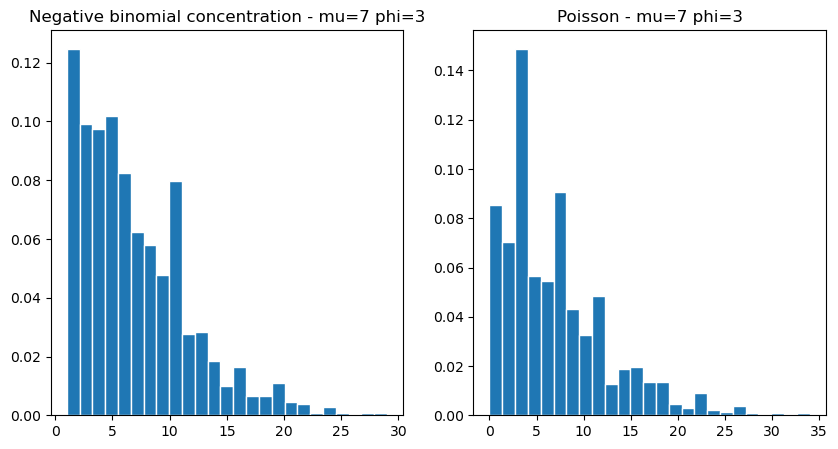

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax1=axes[0]
ax1.hist(nBinD,bins=25, edgecolor='white', density=True)
ax1.set_title(r'Negative binomial concentration - mu=7 phi=3')

ax2=axes[1]
ax2.hist(poissonD,bins=25,edgecolor='white',density=True)
ax2.set_title('Poisson - mu=7 phi=3')

plt.show()

In [64]:
#task3
with open('tStud.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('tStud.stan')

/*T-Student distribution*/
data {
  real df;
  real mu;
  real sigma;
}
generated quantities {
    real y = student_t_rng(df, mu,sigma);
}
Using cached StanModel


In [66]:
df = 1
mu = 2
sigma = 5
samples=[5,10,25,100,200,1000]
data=dict(df=df, mu=mu,sigma=sigma)
sim = []
y = []
for i in range(0,len(samples)):
    sim.append(model.sampling(data=data,algorithm="Fixed_param",iter=samples[i],warmup=0,chains=1))
    y.append(sim[i].extract()['y'])

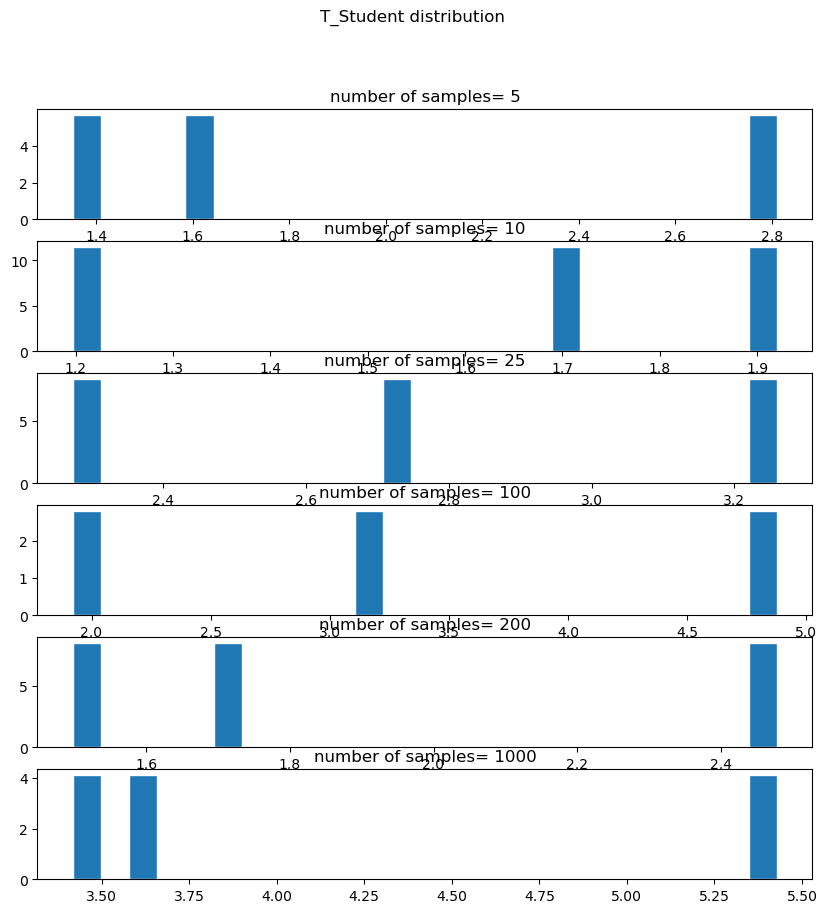

In [103]:
fig, axes = plt.subplots(len(samples), 1, figsize=(10, 10))

fig.suptitle('T_Student distribution')
for i in range(0,len(samples)):
    ax=axes[i]
    ax.hist(y[i],bins=25,edgecolor='white',density=True)
    ax.set_title(r'number of samples= {}'.format(samples[i]))
plt.show()

In [72]:
for i in range(0,len(samples)):
    print("With {} samples:".format(samples[i]))
    print("mean = {}, var = {}".format(np.mean(y[i]), np.var(y[i])))

With 5 samples:
mean = 2.5328173816615367, var = 396.45644524162606
With 10 samples:
mean = -24.18877787240759, var = 5915.120506062186
With 25 samples:
mean = -1.9347137304971054, var = 4580.690936810123
With 100 samples:
mean = -4.694135934440919, var = 8865.012686381067
With 200 samples:
mean = 15.50964599160321, var = 43262.609181409964
With 1000 samples:
mean = 12.577977483415589, var = 292856.6179302044


In [78]:
#task4
with open('multNorm2D.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('multNorm2D.stan')

/*Multivariate normal 2D distribution*/
data {
  vector[2] mu;
  matrix[2,2] sigma;
}
generated quantities {
    vector[2] y = multi_normal_rng(mu,sigma);
}
Using cached StanModel


In [90]:
i=1000
mu = [2, 3]
sigma = [[5, 1], [1, 3]]
corr = cov2corr(sigma)
data=dict(mu=mu,sigma=corr)
sim=model.sampling(data=data,algorithm="Fixed_param",iter=i,warmup=0,chains=1)
params=sim.extract()
y=params['y']
y1= [y[t][0] for t in range(0,i)]
y2= [y[t][1] for t in range(0,i)]

[]

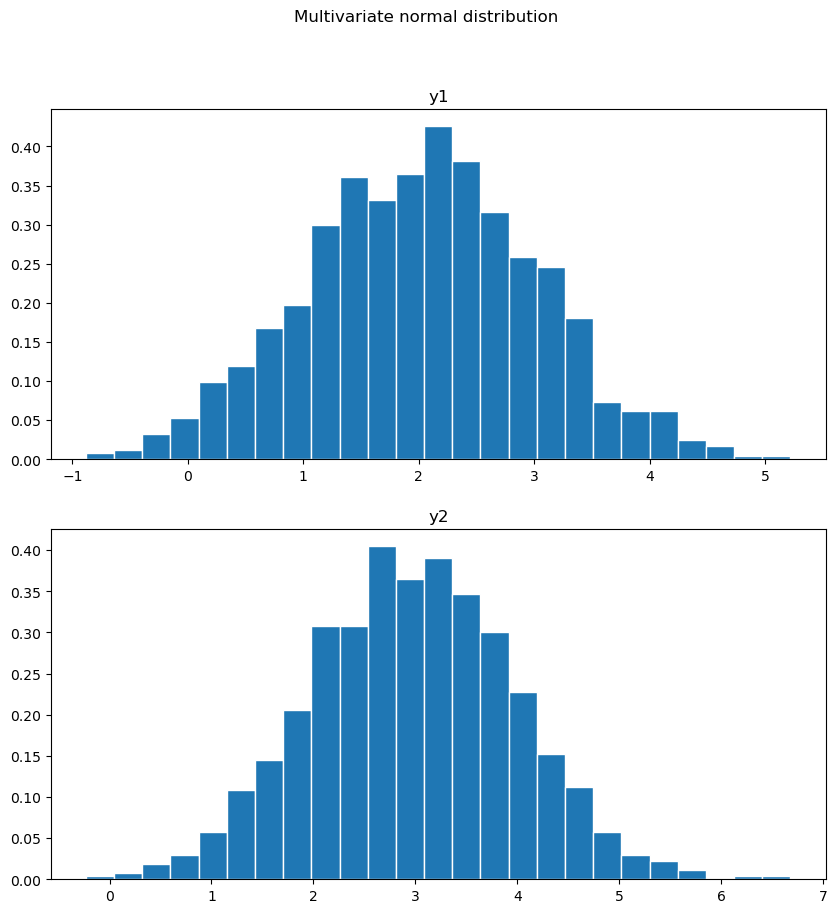

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Multivariate normal distribution')
ax0=axes[0]
ax0.hist(y1,bins=25,edgecolor='white',density=True)
ax0.set_title(r'y1')

ax1=axes[1]
ax1.hist(y2,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y2')

plt.plot()

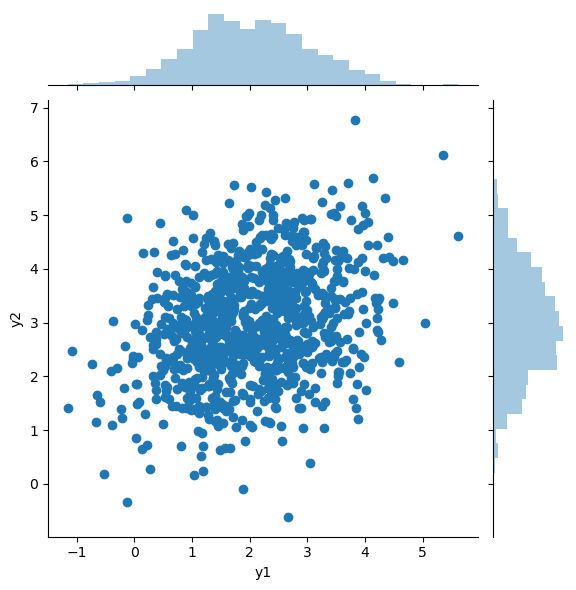

In [92]:
df = pd.DataFrame(y, columns=["y1", "y2"])
sns.jointplot(x="y1", y="y2", data=df)

In [110]:
with open('multNorm3D.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('multNorm3D.stan')

/*Multivariate normal 3D distribution*/
data {
  vector[3] mu;
  matrix[3,3] sigma;
}
generated quantities {
    vector[3] y = multi_normal_rng(mu,sigma);
}
Using cached StanModel


In [111]:
i=1000
mu = [2, 3, 4]
sigma = [[1, 0.4, 0.3], [0.4, 1, 0.5],[0.3, 0.5, 1]]
corr = cov2corr(sigma)
data=dict(mu=mu,sigma=corr)
sim=model.sampling(data=data,algorithm="Fixed_param",iter=i,warmup=0,chains=1)
params=sim.extract()
y=params['y']
y1= [y[t][0] for t in range(0,i)]
y2= [y[t][1] for t in range(0,i)]
y3= [y[t][2] for t in range(0,i)]

[]

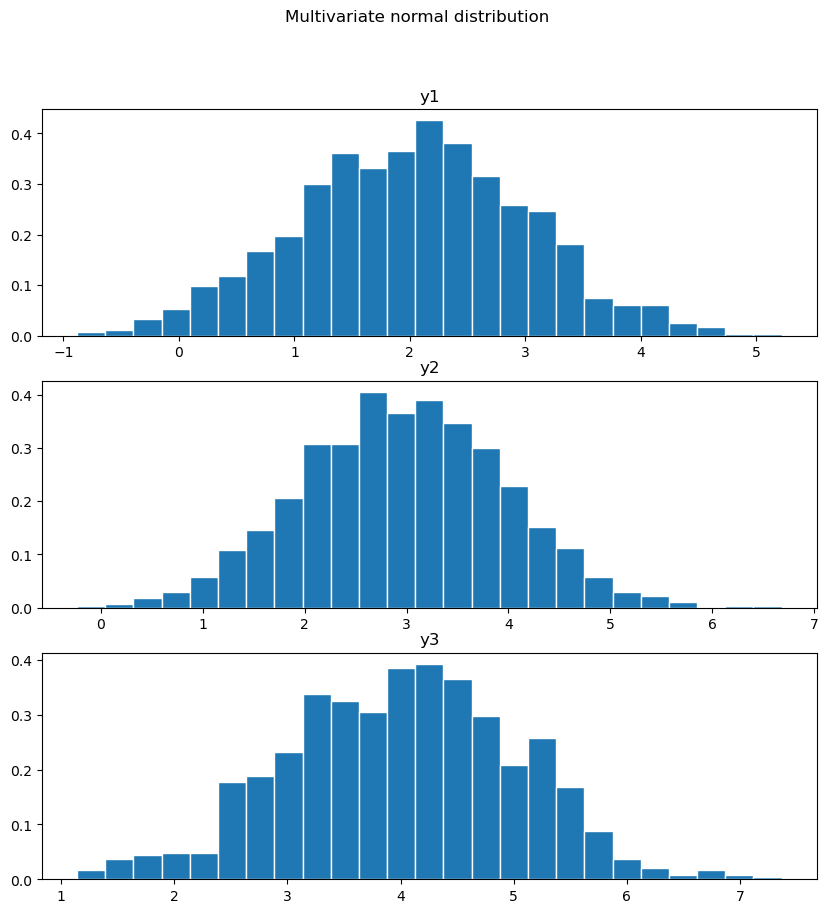

In [105]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Multivariate normal distribution')
ax0=axes[0]
ax0.hist(y1,bins=25,edgecolor='white',density=True)
ax0.set_title(r'y1')

ax1=axes[1]
ax1.hist(y2,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y2')

ax1=axes[2]
ax1.hist(y3,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y3')

plt.plot()

In [112]:
with open('multNorm4D.stan', 'r') as file:
    print(file.read())
model=stan_utility.compile_model('multNorm4D.stan')

/*Multivariate normal 4D distribution*/
data {
  vector[4] mu;
  matrix[4,4] sigma;
}
generated quantities {
    vector[4] y = multi_normal_rng(mu,sigma);
}
Using cached StanModel


In [113]:
i=1000
mu = [2, 3, 4, 1]
sigma = [[3, 0.1, 0.7, 0.2], [0.1, 1, 0.3, 0.5],[0.7, 0.3, 2, 0.2], [0.2, 0.5, 0.2, 2]]
corr = cov2corr(sigma)
data=dict(mu=mu,sigma=corr)
sim=model.sampling(data=data,algorithm="Fixed_param",iter=i,warmup=0,chains=1)
params=sim.extract()
y=params['y']
y1= [y[t][0] for t in range(0,i)]
y2= [y[t][1] for t in range(0,i)]
y3= [y[t][2] for t in range(0,i)]
y4= [y[t][3] for t in range(0,i)]

[]

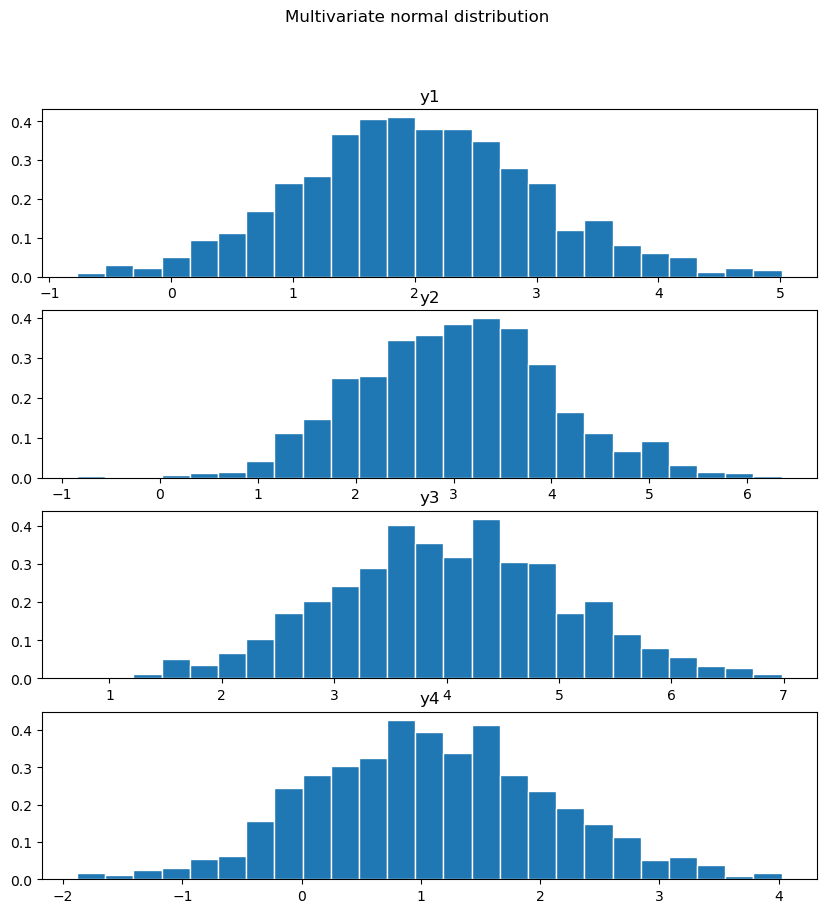

In [114]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
fig.suptitle('Multivariate normal distribution')
ax0=axes[0]
ax0.hist(y1,bins=25,edgecolor='white',density=True)
ax0.set_title(r'y1')

ax1=axes[1]
ax1.hist(y2,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y2')

ax1=axes[2]
ax1.hist(y3,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y3')

ax1=axes[3]
ax1.hist(y4,bins=25,edgecolor='white',density=True)
ax1.set_title(r'y4')

plt.plot()